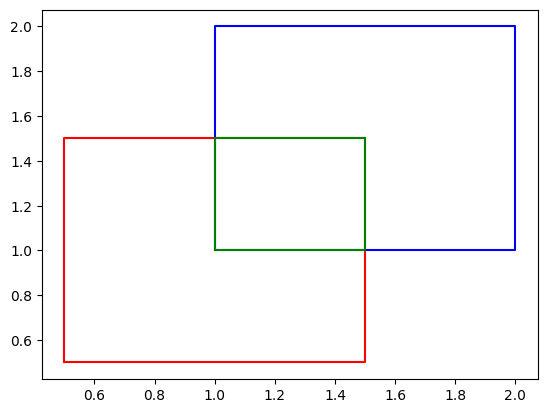

In [1]:
import matplotlib.pyplot as plt

def intersection(cp1, cp2, s, e):
    dc = [cp1[0] - cp2[0], cp1[1] - cp2[1]]
    dp = [s[0] - e[0], s[1] - e[1]]
    n1 = cp1[0] * cp2[1] - cp1[1] * cp2[0]
    n2 = s[0] * e[1] - s[1] * e[0] 
    n3 = 1.0 / (dc[0] * dp[1] - dc[1] * dp[0])
    return [(n1 * dp[0] - n2 * dc[0]) * n3, (n1 * dp[1] - n2 * dc[1]) * n3]

def inside(p, cp1, cp2):
    return (cp2[0] - cp1[0]) * (p[1] - cp1[1]) > (cp2[1] - cp1[1]) * (p[0] - cp1[0])

def sutherland_hodgman_polygon_clipper(subject_polygon, clip_polygon):
    output_list = subject_polygon
    cp1 = clip_polygon[-1]

    for clip_vertex in clip_polygon:
        cp2 = clip_vertex
        input_list = output_list
        output_list = []
        s = input_list[-1]

        for subject_vertex in input_list:
            e = subject_vertex
            if inside(e, cp1, cp2):
                if not inside(s, cp1, cp2):
                    output_list.append(intersection(cp1, cp2, s, e))
                output_list.append(e)
            elif inside(s, cp1, cp2):
                output_list.append(intersection(cp1, cp2, s, e))
            s = e
        cp1 = cp2
    return output_list

def plot_polygon(polygon, color='blue'):
    x, y = zip(*polygon)
    plt.plot(x + x[:1], y + y[:1], color)

def main():
    subject_polygon = [(1,1), (1,2), (2,2), (2,1)]
    clip_polygon = [(0.5,0.5), (1.5,0.5), (1.5,1.5), (0.5,1.5)]
    result = sutherland_hodgman_polygon_clipper(subject_polygon, clip_polygon)
    plot_polygon(subject_polygon, 'blue')
    plot_polygon(clip_polygon, 'red')
    plot_polygon(result, 'green')
    plt.show()

if __name__ == '__main__':
    main()